In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,Perceptron
from sklearn import tree
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
#Use data from train.csv for training and testing datasets
#test.csv doesn't contain ground-truth labels so we wouldn't be able to determine testing accuracy from it
dataset = pd.read_csv('train.csv')
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

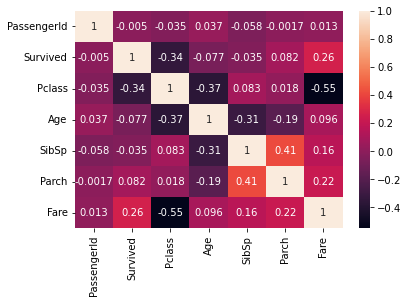

In [7]:
sns.heatmap(dataset.corr(),annot=True)

<AxesSubplot:>

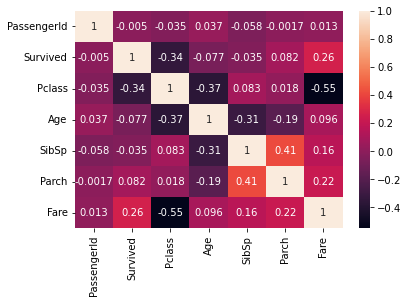

In [8]:
sns.heatmap(dataset.corr(),annot=True)

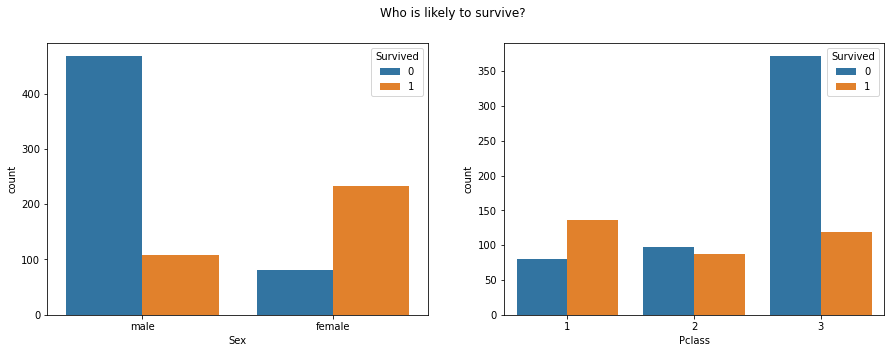

In [9]:
f,ax = plt.subplots(1,2,figsize=(15,5))
f.suptitle('Who is likely to survive?')
sns.countplot(x='Sex',hue='Survived',data=dataset,ax=ax[0])
sns.countplot(x='Pclass',hue='Survived',data=dataset,ax=ax[1])
plt.show()

- The first plot shows that the female is more likely to survive than male.
- The second plot shows that individuals in the first class are more likely to survive than other classes.

## Filling in missing values

### Cabin

The deck was determined by the letter in the cabin. We will group the cabins based on the deck they are on. For all the missing values, we will fill in U for unknown.

In [10]:
print('number of unique cabins: '+str(dataset['Cabin'].nunique())+ ' and number of missing cabins: '+ str(dataset['Cabin'].isnull().sum()))

number of unique cabins: 147 and number of missing cabins: 687


In [11]:
dataset['deck'] = dataset['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

Text(0.5, 1.0, 'Survival rates by deck')

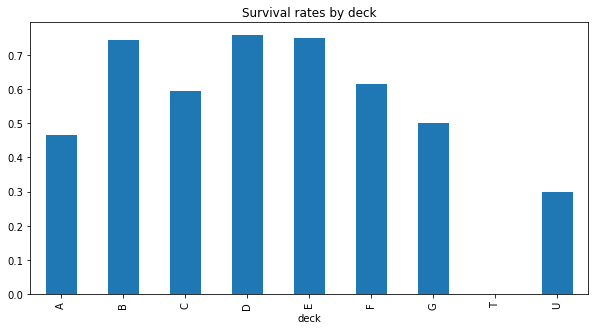

In [12]:
# then let's check our assumptions about the survival by deck
dataset[['deck', 'Survived']].groupby('deck')['Survived'].mean().plot(kind='bar',figsize=(10,5))
plt.title('Survival rates by deck')


In [13]:
dataset['deck'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: deck, dtype: int64

In [14]:
dataset.loc[dataset['deck'] == 'T', 'deck'] = 'U'

In [15]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


### Age

- We are to check how age affects the survival rate.
- Based on the heatmap, there is a correlation between age and Pclass.
- We can also check if age makes a difference based on gender. 


<AxesSubplot:xlabel='Age', ylabel='Density'>

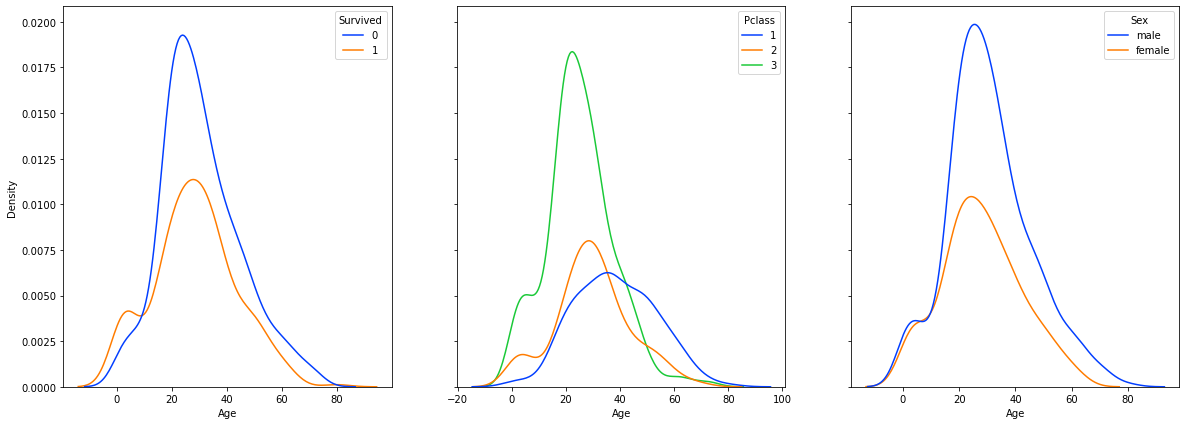

In [16]:
f,ax= plt.subplots(1,3,figsize=(20,7),sharey=True)
sns.kdeplot(x='Age',data=dataset,hue='Survived',palette='bright',ax=ax[0])
sns.kdeplot(x='Age',data=dataset,hue='Pclass',palette='bright',ax=ax[1])
sns.kdeplot(x='Age',data=dataset,hue='Sex',palette='bright' ,ax=ax[2])



- The first plot shows that people between the ages 20 and 40 survived more than the rest.
- The second plot shows that people in the first class are slightly older than the other classes.
- The third plot shows that there are differences in age based on sex. We can say age is correlated to sex.

With this said, we cannot use the overall mean/median to fill in all the missing values. We will take into account the sex and class of each individual, so using the mean/median per category might be better approach.

In [17]:
print('number of missing ages: '+str(dataset['Age'].isnull().sum()))

number of missing ages: 177


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

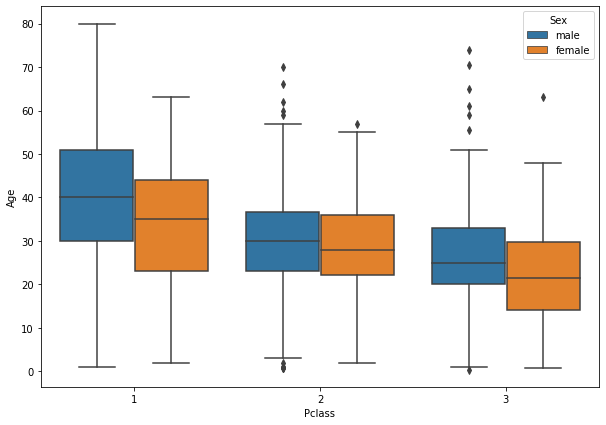

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=dataset)

In [19]:
#There is an age difference between the ages of difreent classes and sex within the dataset
dataset['Age'] = dataset.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

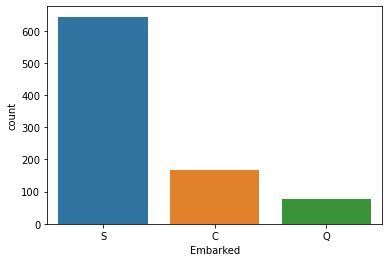

In [20]:
sns.countplot(x='Embarked',data=dataset)

In [21]:
print('The number of missing values for Embarked port: '+str(dataset['Embarked'].isnull().sum()))
dataset[dataset['Embarked'].isnull()]



The number of missing values for Embarked port: 2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


The most common port is S (SouthHamptons). So we will use this port to fill in the missing ports.

In [22]:
dataset['Embarked']=dataset['Embarked'].fillna(value='S')

### Fare

We will fill in the missing fare value based on the class and port embarked.

In [23]:
dataset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck


In [24]:
x = dataset[(dataset['Pclass']=='3')& (dataset['Embarked']=='S')]['Fare'].median()
dataset['Fare']= dataset['Fare'].fillna(x)

## Feature Engineering

### Name

We can extract the title from the name feature and form categories based on the titles.

In [25]:
dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


<AxesSubplot:xlabel='Title', ylabel='count'>

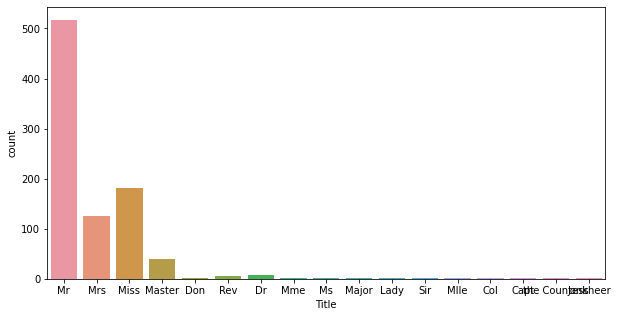

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=dataset)



In [27]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,U,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Mr


Some titles have few values, so we have grouped them as Other.

In [28]:
dataset['Title'] = np.where(dataset['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), dataset['Title'], 'Other')

In [29]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,U,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

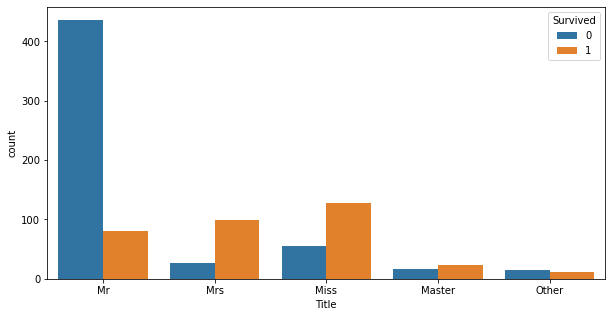

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=dataset,hue='Survived')



### Ticket

Some tickects contain letters and numerical values.The plan is to remove all the letters form the string, then group the tickets based on the first leading digit.


In [31]:
#check if there a letters or not
def prefix(ticket):
    
    check = ticket.split(' ')[0][0]
    if check.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'No prefix'

def ticket_features(df):
    
    df['Ticket'] = df['Ticket'].replace('LINE','LINE 0')
    df['Ticket'] = df['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
    df['Prefix'] = df['Ticket'].apply(lambda x: prefix(x))
    df['TNumeric'] = df['Ticket'].apply(lambda x: int(x.split(' ')[-1]))
    df['TNlen'] = df['TNumeric'].apply(lambda x : len(str(x)))
    df['Ticket_LeadingDigit'] = df['TNumeric'].apply(lambda x : int(str(x)[0]))
    df['TGroup'] = df['TNumeric'].apply(lambda x: str(x//10))

    df = df.drop(columns=['Ticket','TNumeric','Prefix','TNlen','TGroup'])

    return df

dataset = ticket_features(dataset)
dataset.head(1)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,deck,Title,Ticket_LeadingDigit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S,U,Mr,2


In [32]:
dataset['deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [33]:
#Datatypes after preprocessing
dataset.dtypes

PassengerId              int64
Survived                 int64
Pclass                   int64
Name                    object
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Cabin                   object
Embarked                object
deck                    object
Title                   object
Ticket_LeadingDigit      int64
dtype: object

### Encoding Categorical features

In [34]:
# encoding sex column
dataset.replace({'Sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'embarked' column
dataset.replace({'Embarked':{'C':0,'S':1, 'Q':2}}, inplace=True)

#encoding title column
dataset.replace({'Title':{'Mr':0,'Mrs':1, 'Master':2, 'Miss':3, 'Other':5}}, inplace=True)

deck = pd.get_dummies(dataset['deck'],prefix='Cabin')
dataset = dataset.drop(columns= ['Cabin', 'Name', 'deck'], axis=1)
dataset= pd.concat([dataset,deck],axis=1)


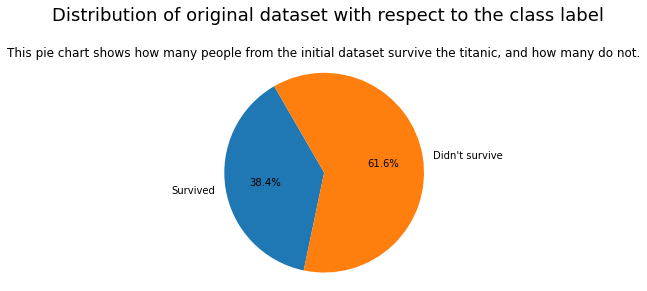

In [35]:
num_survived = sum(dataset['Survived'] == 1)
num_not_survived = sum(dataset['Survived'] == 0)

labels = ["Survived", "Didn't survive"]
sizes = [num_survived, num_not_survived]

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%',  startangle=120)
plt.axis('equal')
plt.suptitle("Distribution of original dataset with respect to the class label", y=1, fontsize=18)
plt.title("This pie chart shows how many people from the initial dataset survive the titanic, and how many do not.")
plt.tight_layout()
plt.show()

In [36]:
#Need to minimise False Negatives

The results above show that we are interested in minimising our false negatives. 

### Splitting the data

#### Splitting into testing and training set

In [37]:
#Update
#I had to split the training file because the test file doesn't have any ground-truth labels so we can't find testing accuracy from it
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset, test_size=0.2)

#### Splitting into input features and class label

In [38]:
y_train = train['Survived']
x_train = train.drop(['Survived', 'PassengerId'], axis=1)

y_test = test['Survived']
x_test = test.drop(['Survived', 'PassengerId'], axis=1)

In [39]:
# std_scaler = StandardScaler()
# x_train = std_scaler.fit_transform(x_train)
# x_test=std_scaler.fit_transform(x_test)

In [40]:
#Print Input Features (Column Names)
train_columns = ""
for i in range(0, len(x_train.columns)):
    train_columns += x_train.columns[i]
    if i != len(x_train.columns)-1:
        train_columns += ", "

print(f"Input Features:\n{train_columns}\n")

#Print Output Feature (Column Name)
#There's only one output feature
print(f"Output Feature: Survived")

Input Features:
Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title, Ticket_LeadingDigit, Cabin_A, Cabin_B, Cabin_C, Cabin_D, Cabin_E, Cabin_F, Cabin_G, Cabin_U

Output Feature: Survived


Convert Dataframe to Matrix

In [41]:
#Training Set
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

#x_train = np.insert(x_train, 0, 1, axis=1) #insert a first column of 1's as x0 
#print(x_train)

In [42]:
#Testing Set
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

#x_test = np.insert(x_test, 0, 1, axis=1) #insert a first column of 1's as x0 
#print(x_test)

In [43]:
# #Pick 10 learning rates
# learning_rates = [0.0000005 * i for i in range(10)]

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each learning rate
# for i in range(0,len(learning_rates)):
#     print(f"Learning Rate: {learning_rates[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(0.5, learning_rates[i],0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)
    
#     logreg = LogisticRegression(tol=0.005, C=1, max_iter= 1000)
#     logreg.fit(x_train, y_train)
#     y_pred = logreg.predict(x_test)

## Stochastic Gradient Descent (Logistic Regression with Gradient Descent)

This is essentially Logistic Regression using Gradient Descent as the optimisation technique for the problem. 

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

#Perform Fit
#Set random state to fixed value to keep random distribution of initial weights consistent for multiple fits 
stochGD = SGDClassifier(max_iter=1000, tol=1e-3,random_state=3)
stochGD = stochGD.fit(x_train, y_train) #coef_init not working

#Metrics
print("Stochastic Gradient Descent Metrics:\n")
print(f"Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Testing Accuracy: {stochGD.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, stochGD.predict(x_test))}")


Stochastic Gradient Descent Metrics:

Training Accuracy: 0.7584269662921348
Testing Accuracy: 0.776536312849162
Precision: 0.6703296703296703
Recall: 0.8591549295774648
F1 Score: 0.7530864197530862
Matthew's Correlation Coefficient: 0.5689013702491006


In [45]:
stochGD = stochGD.fit(x_train, y_train) #coef_init not working
#Metrics
print("Stochastic Gradient Descent Metrics:\n")
print(f"Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Testing Accuracy: {stochGD.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, stochGD.predict(x_test))}")

Stochastic Gradient Descent Metrics:

Training Accuracy: 0.7584269662921348
Testing Accuracy: 0.776536312849162
Precision: 0.6703296703296703
Recall: 0.8591549295774648
F1 Score: 0.7530864197530862
Matthew's Correlation Coefficient: 0.5689013702491006


Confusion Matrix


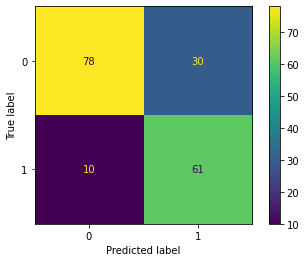

In [46]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test, stochGD.predict(x_test))
d=ConfusionMatrixDisplay(c_matrix)
d.plot() 

In [47]:
# #hyper parameter optimisation
# stochGD=SGDClassifier()
# param_grid = {
#     "loss" : ["hinge", "log_loss", "modified_huber", "perceptron", "squared_hinge"],
#     "alpha" : [0.0001, 0.001, 0.01, 0.1],
#     'eta0': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
#     "penalty" : ["l2", "l1", "elasticnet", "none"],
#     'max_iter': [5000]

# }
              
# clf_sgd = GridSearchCV(stochGD, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1)
# best_clf_sgd = clf_sgd.fit(x_train,y_train)
# print('Best Score: ' + str(np.round(best_clf_sgd.best_score_*100,2))+'%')
# print('Best Parameters: ' + str(best_clf_sgd.best_params_))
# print('Accuracy of Stochastic Gradient Descent Classifier In Test-set :'+str(np.round(best_clf_sgd.score(x_test,y_test)*100,2))+'%')

## Optimisation Techniques

### Feature Scaling

In [48]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.fit_transform(x_test)
#x_test_scaled

array([[0.5       , 0.        , 0.26848249, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.61089494, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.3618677 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.03501946, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.3463035 , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.28404669, ..., 0.        , 0.        ,
        1.        ]])

In [49]:
#Perform Fit
#Set random state to fixed value to keep random distribution of initial weights consistent for multiple fits 
stochGD = SGDClassifier(max_iter=1000, tol=1e-3,random_state=3)
stochGD = stochGD.fit(x_train_scaled, y_train)

#Metrics
print("Stochastic Gradient Descent Metrics:\n")
print(f"Training Accuracy: {stochGD.score(x_train_scaled,y_train)}")
print(f"Testing Accuracy: {stochGD.score(x_test_scaled,y_test)}")
print(f"Precision: {precision_score(y_test, stochGD.predict(x_test_scaled),average='binary')}")
print(f"Recall: {recall_score(y_test, stochGD.predict(x_test_scaled),average='binary')}")
print(f"F1 Score: {f1_score(y_test, stochGD.predict(x_test_scaled),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, stochGD.predict(x_test_scaled))}")

Stochastic Gradient Descent Metrics:

Training Accuracy: 0.7443820224719101
Testing Accuracy: 0.7541899441340782
Precision: 1.0
Recall: 0.38028169014084506
F1 Score: 0.5510204081632654
Matthew's Correlation Coefficient: 0.5198077993431504


Confusion Matrix


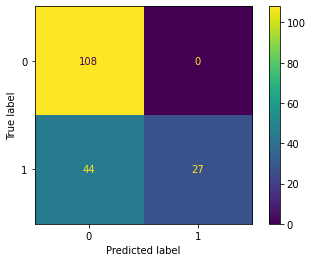

In [50]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test, stochGD.predict(x_test_scaled))
d=ConfusionMatrixDisplay(c_matrix)
d.plot() 

### Feature Standardisation

In [85]:
# fig, ax = plt.subplots(figsize=(12, 4))

std_scaler = StandardScaler()
x_train_std = std_scaler.fit_transform(x_train)
x_test_std =std_scaler.fit_transform(x_test)

# ax.scatter(x_train[:,0], y_train)
# ax.scatter(x_train[:,1], y_train)
# ax.scatter(x_train[:,2], y_train)
# ax.scatter(x_train[:,3], y_train)
# ax.scatter(x_train[:,4], y_train)

In [86]:
#Perform Fit
#Set random state to fixed value to keep random distribution of initial weights consistent for multiple fits 
stochGD = SGDClassifier(max_iter=1000, tol=1e-3,random_state=3)
stochGD = stochGD.fit(x_train_std, y_train)

#Metrics
print("Stochastic Gradient Descent Metrics:\n")
print(f"Training Accuracy: {stochGD.score(x_train_std,y_train)}")
print(f"Testing Accuracy: {stochGD.score(x_test_std,y_test)}")
print(f"Precision: {precision_score(y_test, stochGD.predict(x_test_std),average='binary')}")
print(f"Recall: {recall_score(y_test, stochGD.predict(x_test_std),average='binary')}")
print(f"F1 Score: {f1_score(y_test, stochGD.predict(x_test_std),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, stochGD.predict(x_test_std))}")

Stochastic Gradient Descent Metrics:

Training Accuracy: 0.7808988764044944
Testing Accuracy: 0.7821229050279329
Precision: 0.7352941176470589
Recall: 0.704225352112676
F1 Score: 0.7194244604316546
Matthew's Correlation Coefficient: 0.5418149568417242


Confusion Matrix


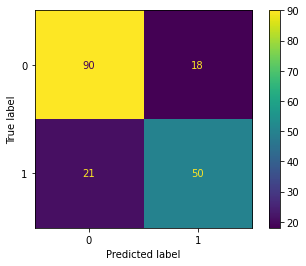

In [87]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test, stochGD.predict(x_test_std))
d=ConfusionMatrixDisplay(c_matrix)
d.plot() 

### Optimising Recall (minimising false negatives)

Initial Recall: 0.8591549295774648
Initial Training Accuracy: 0.7584269662921348
Initial Testing Accuracy: 0.776536312849162
Confusion Matrix

Updated Recall: 0.8591549295774648
Updated Training Accuracy: 0.8339483394833949
Updated Testing Accuracy: 0.8591549295774648


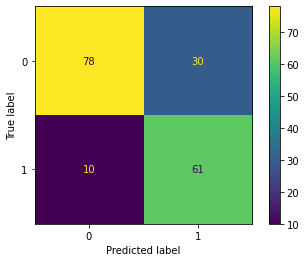

In [54]:
from sklearn.model_selection import GridSearchCV 


#Perform Fit
#Set random state to fixed value to keep random distribution of initial weights consistent for multiple fits 
stochGD = SGDClassifier(max_iter=1000, tol=1e-3,random_state=3)
stochGD = stochGD.fit(x_train, y_train)
print(f"Initial Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Initial Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Initial Testing Accuracy: {stochGD.score(x_test,y_test)}")

print("Confusion Matrix")
c_matrix = confusion_matrix(y_test, stochGD.predict(x_test))
d=ConfusionMatrixDisplay(c_matrix)
#d.ax_.set_title("confusion_matrix")
d.plot() 

print()
param_grid = {
#     'n_estimators': [10,200],
#     'max_features': ['auto','sqrt','log2',0.5],
}

gs = GridSearchCV(stochGD, param_grid=param_grid, scoring = 'recall',n_jobs= -1,cv=10)
gs = gs.fit(x_train,y_train)

print(f"Updated Recall: {recall_score(y_test, gs.best_estimator_.predict(x_test),average='binary')}")
print(f"Updated Training Accuracy: {gs.score(x_train,y_train)}")
print(f"Updated Testing Accuracy: {gs.score(x_test,y_test)}")


In [98]:
#Apply Feature Standardisation
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [117]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.0


### Optimising Model Parameters

#### Learning Rate

In [134]:
#Perform Fit
#Set random state to fixed value to keep random distribution of initial weights consistent for multiple fits 
stochGD = SGDClassifier(max_iter=1000, tol=1e-3,random_state=3)
stochGD = stochGD.fit(x_train, y_train)

param_grid = {
     "loss" : ["hinge",  "modified_huber", "perceptron", "squared_hinge"],
    "alpha" : [0.1 * i for i in range(1,10+1)],
     'eta0': [0.1 * i for i in range(1,10+1)],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
    'max_iter': [5000]
}

start_time = time.time()
gs = GridSearchCV(stochGD, param_grid=param_grid, n_jobs= -1,cv=10,scoring='recall')
gs = gs.fit(x_train,y_train)
end_time = time.time()

print(f"Search Time is: {end_time-start_time}s")

stochGD = gs.best_estimator_
print(f"Updated Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Updated Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Updated Testing Accuracy: {stochGD.score(x_test,y_test)}\n")

print("====== Results from Grid Search ======" )
print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
print("\n The best score across ALL searched params:\n",gs.best_score_)
print("\n The best parameters across ALL searched params:\n",gs.best_params_)

Search Time is: 23.4132239818573s
Updated Recall: 0.6901408450704225
Updated Training Accuracy: 0.8202247191011236
Updated Testing Accuracy: 0.8044692737430168

====== Results from Grid Search ======

 The best estimator across ALL searched params:
 SGDClassifier(alpha=0.1, eta0=0.1, loss='modified_huber', max_iter=5000,
              random_state=3)

 The best score across ALL searched params:
 0.7201058201058201

 The best parameters across ALL searched params:
 {'alpha': 0.1, 'eta0': 0.1, 'loss': 'modified_huber', 'max_iter': 5000, 'penalty': 'l2'}


In [136]:
start_time = time.time()
gs = GridSearchCV(stochGD, param_grid=param_grid, n_jobs= -1,cv=10,scoring='precision')
gs = gs.fit(x_train,y_train)
end_time = time.time()

print(f"Search Time is: {end_time-start_time}s")

stochGD = gs.best_estimator_
print(f"Updated Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Updated Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Updated Testing Accuracy: {stochGD.score(x_test,y_test)}\n")

print("====== Results from Grid Search ======" )
print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
print("\n The best score across ALL searched params:\n",gs.best_score_)
print("\n The best parameters across ALL searched params:\n",gs.best_params_)

Search Time is: 25.05844759941101s
Updated Recall: 0.49295774647887325
Updated Training Accuracy: 0.7710674157303371
Updated Testing Accuracy: 0.7877094972067039

====== Results from Grid Search ======

 The best estimator across ALL searched params:
 SGDClassifier(alpha=1.0, eta0=0.1, max_iter=5000, random_state=3)

 The best score across ALL searched params:
 0.8156553521484872

 The best parameters across ALL searched params:
 {'alpha': 1.0, 'eta0': 0.1, 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l2'}


In [137]:
start_time = time.time()
gs = GridSearchCV(stochGD, param_grid=param_grid, n_jobs= -1,cv=10,scoring='f1')
gs = gs.fit(x_train,y_train)
end_time = time.time()

print(f"Search Time is: {end_time-start_time}s")

stochGD = gs.best_estimator_
print(f"Updated Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Updated Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Updated Testing Accuracy: {stochGD.score(x_test,y_test)}\n")

print("====== Results from Grid Search ======" )
print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
print("\n The best score across ALL searched params:\n",gs.best_score_)
print("\n The best parameters across ALL searched params:\n",gs.best_params_)

Search Time is: 23.400326013565063s
Updated Recall: 0.704225352112676
Updated Training Accuracy: 0.824438202247191
Updated Testing Accuracy: 0.8156424581005587

====== Results from Grid Search ======

 The best estimator across ALL searched params:
 SGDClassifier(alpha=0.30000000000000004, eta0=0.1, loss='squared_hinge',
              max_iter=5000, random_state=3)

 The best score across ALL searched params:
 0.733730062887654

 The best parameters across ALL searched params:
 {'alpha': 0.30000000000000004, 'eta0': 0.1, 'loss': 'squared_hinge', 'max_iter': 5000, 'penalty': 'l2'}


In [138]:
start_time = time.time()
gs = GridSearchCV(stochGD, param_grid=param_grid, n_jobs= -1,cv=10,scoring='accuracy')
gs = gs.fit(x_train,y_train)
end_time = time.time()

print(f"Search Time is: {end_time-start_time}s")

stochGD = gs.best_estimator_
print(f"Updated Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Updated Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Updated Testing Accuracy: {stochGD.score(x_test,y_test)}\n")

print("====== Results from Grid Search ======" )
print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
print("\n The best score across ALL searched params:\n",gs.best_score_)
print("\n The best parameters across ALL searched params:\n",gs.best_params_)

Search Time is: 21.84722661972046s
Updated Recall: 0.704225352112676
Updated Training Accuracy: 0.824438202247191
Updated Testing Accuracy: 0.8156424581005587

====== Results from Grid Search ======

 The best estimator across ALL searched params:
 SGDClassifier(alpha=0.30000000000000004, eta0=0.1, loss='squared_hinge',
              max_iter=5000, random_state=3)

 The best score across ALL searched params:
 0.8050078247261346

 The best parameters across ALL searched params:
 {'alpha': 0.30000000000000004, 'eta0': 0.1, 'loss': 'squared_hinge', 'max_iter': 5000, 'penalty': 'l2'}


In [140]:
#gs.get_params()

In [141]:
#[0.00001 * i for i in range(100000+1)][-1]

In [142]:
#[0.001 * i for i in range(1,1000+1)]

## Logistic Regression 

Note, this is Logistic Regression implemented in sklearn. The default optimisation technique used here is the 'lbfgs solver' which is the Limited-memory Broyden–Fletcher–Goldfarb–Shanno technique.

In [55]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(tol=0.005, C=1, max_iter= 1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
#print(getAccuracy(y_test, y_pred))

print("Logistic Regression Metrics:\n")
print(f"Training Accuracy: {logreg.score(x_train,y_train)}")
print(f"Testing Accuracy: {logreg.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, logreg.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, logreg.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, logreg.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, logreg.predict(x_test))}")

Logistic Regression Metrics:

Training Accuracy: 0.8286516853932584
Testing Accuracy: 0.8044692737430168
Precision: 0.7727272727272727
Recall: 0.7183098591549296
F1 Score: 0.7445255474452555
Matthew's Correlation Coefficient: 0.5875219161842259


Confusion Matrix


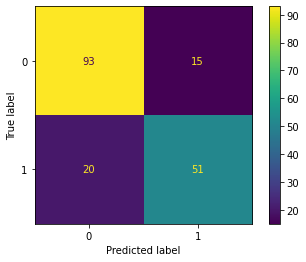

In [56]:
print('Confusion Matrix')
c_matrix = confusion_matrix(y_test, logreg.predict(x_test))
d=ConfusionMatrixDisplay(c_matrix)
d.plot()

In [57]:
#optimization of Logistic Regression hyperparameters
#logreg = LogisticRegression()
param_grid = {'max_iter' : [100,200,2000,5000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 8, 22),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(logreg, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train,y_train)
print('Best Accuracy: ' + str(np.round(best_clf_lr.best_score_*100,2))+'%')
print('Best Parameters: ' + str(best_clf_lr.best_params_))
print('Accuracy of Logistic Regression In Test-set :'+str(np.round(best_clf_lr.score(x_test,y_test)*100,2))+'%')

Fitting 4 folds for each of 176 candidates, totalling 704 fits
Best Accuracy: 80.76%
Best Parameters: {'C': 517947.4679231202, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of Logistic Regression In Test-set :80.45%


Confusion Matrix


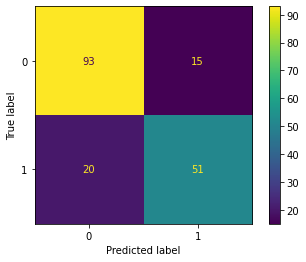

In [58]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

c_matrix = confusion_matrix(y_test, logreg.predict(x_test))

# print("Confusion Matrix:")
# print(c_matrix)
# print()

# TP = c_matrix[0][0]
# FP = c_matrix[0][1]
# FN = c_matrix[1][0]
# TN = c_matrix[1][1]

# print(f"True Positives: {TP}, False Positives: {FP}")
# print(f"True Negatives: {TN}, False Negatives: {FN}")
# print()

# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")





print("Confusion Matrix")
plot_confusion_matrix(logreg, x_test, y_test) 



## Decision Tree

In [59]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(x_train, y_train)
#tree.plot_tree(dec_tree)
print("Decision Trees Metrics:\n")
print(f"Training Accuracy: {dec_tree.score(x_train,y_train)}")
print(f"Testing Accuracy: {dec_tree.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, dec_tree.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, dec_tree.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, dec_tree.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, dec_tree.predict(x_test))}")

Decision Trees Metrics:

Training Accuracy: 0.9901685393258427
Testing Accuracy: 0.7877094972067039
Precision: 0.72
Recall: 0.7605633802816901
F1 Score: 0.7397260273972602
Matthew's Correlation Coefficient: 0.5613082589795484


Confusion Matrix


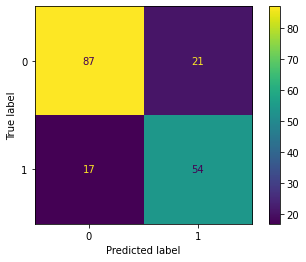

In [60]:
print("Confusion Matrix")
plot_confusion_matrix(dec_tree, x_test, y_test) 

## Perceptron

In [61]:
from sklearn.linear_model import Perceptron

percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(x_train, y_train)

print("Perceptron Metrics:\n")
print(f"Training Accuracy: {percep.score(x_train,y_train)}")
print(f"Testing Accuracy: {percep.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, percep.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, percep.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, percep.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, percep.predict(x_test))}")

Perceptron Metrics:

Training Accuracy: 0.7176966292134831
Testing Accuracy: 0.7541899441340782
Precision: 0.6588235294117647
Recall: 0.7887323943661971
F1 Score: 0.717948717948718
Matthew's Correlation Coefficient: 0.5096236741028191


Confusion Matrix


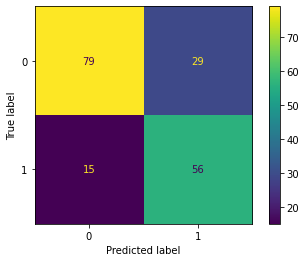

In [62]:
print("Confusion Matrix")
plot_confusion_matrix(percep, x_test, y_test) 

# IGNORE FROM HERE

In [63]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve , roc_auc_score , \
# precision_recall_curve , auc
# import seaborn as sns
# % matplotlib inline
# % config InlineBackend.figure_format = ' svg '

# X , y = make_classification(n_samples = 10000, n_classes = 2, weights [ 0.95,0.05 ] , random_state = 42)
# X_train , X_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 2 )
# model = LogisticRegression( ) .fit ( X_train , y_train )

In [64]:
# from sklearn.metrics import roc_curve , roc_auc_score, precision_recall_curve , auc
# import seaborn as sns

# #ROC Curve
# fpr, tpr, thresholds = roc_curve (y_test, logreg.predict(x_test))
# sns.lineplot ([ 0 , 1 ] , [ 0 , 1 ] , linestyle = '--' )
# plt = sns.lineplot(fpr, tpr, marker = '.')
# auc_score = roc_auc_score (y_test , logreg.predict(x_test))
# print('AUC: %.3f ' % auc_score )

In [65]:
# #Precision/Recall Curve
# precision, recall, thresholds = precision_recall_curve(y_test,logreg.predict(x_test) )
# pr_auc_score = auc(recall,precision)
# sns.lineplot ([ 0 , 1 ] , [ 0 , 1 ] , linestyle = '--' )
# plt = sns.lineplot(recall, precision, marker = '.')
# print('AUC: %.3f ' % pr_auc_score )

In [66]:
# print('\n\n\n\n\n\n')
# print('Old Code Below')

Initialise B: set of training parameters

In [67]:
# B = np.random.normal(size = x_train.shape[1]) #x_train.shape[1] = number of features including x0
# print(B)

Sigmoid function

In [68]:
# def sigmoid(x):
#     if x > 700:      #avoid math overflow error
#         sig = 1.0

#     elif x <= -700: #avoid math overflow error
#         sig = 0

#     else:
#         sig = 1 / (1 + math.exp(-x))
        
#     return sig

get H_x from function below

In [69]:
# def g_z(X, B):
#     Y = []
#     for i in range(X.shape[0]):
#         z = np.dot(X[i], B) #multiply B times X
#         Y.append(sigmoid(z))
    
#     return np.asarray(Y) #convert list to array

Error Function

In [70]:
# def J_B(true_y, pred_y, B, regPara):
#     epsilon = 1e-5 # to prevent 0 values in log

#     a  = (true_y * np.log(pred_y + epsilon)) + ((1-true_y) * np.log((1 - pred_y) +epsilon))
#     b = regPara * (np.sum(np.square(B[1:]))) 
#     return (-1 * np.sum(a)) + b

Get Prediction Function

In [71]:
# def getPredictions(H_x):
#     Y = []
#     for i in range(H_x.size):
#         if(H_x[i] >= 0.5):
#             Y.append(1)
#         else:
#             Y.append(0)
#     return np.asarray(Y)

Get Accuracy function

In [72]:
# def getAccuracy(y_true, y_pred):
#     sum = 0
#     for i in range(y_true.size):
#         if y_true[i] == y_pred[i]:
#             sum = sum + 1
            
#     return np.round(sum/y_true.size,4)

Gradient Descent with regularization Function

In [73]:
#  #Y(actual values),X(features), B(training parameters), reg_para(regularisation parameter), l_rate(learning rate), epsilon(stop GD when norm < epsilon)
# def Grad_Desc(Y, X, B, reg_para, l_rate, epsilon):
#     norm = epsilon + 1
#     H_x = g_z(X, B)
#     B_old = B.copy()
#     while norm > epsilon:
#         for i in range(B.size):
#             if i == 0: # no regularization
#                 B[i] = B[i] - (l_rate * np.sum(H_x - Y))
#             else:
#                 B[i] = B[i] - (l_rate * (np.sum((H_x - Y) * X[:,i]) - (reg_para * B[i] / X.shape[0])))
#         norm = np.linalg.norm(np.subtract(B,B_old), 2)
#         H_x = g_z(X, B)
#         B_old = B.copy()
        
#     return B

In [74]:
# print("Original Parameters")
# print(B)

# h_x = g_z(x_train, B)
# print("Original Error: " + str(J_B(y_train, h_x, B, regPara=0.5)) )

# print("Accuracy: " + str(getAccuracy(y_train, getPredictions(h_x)) * 100) + "%")

Perform Gradient Descent

In [75]:
# print(np.shape(x_test))
# print(np.shape(x_train))
# print(x_train[0])
# print(x_test[0])

In [76]:
# import time

# def Logistic_Regression(new_reg_para,new_l_rate,new_epsilon):
#     start_time = time.time()
#     B_new = Grad_Desc(y_train, x_train, B.copy(), reg_para=new_reg_para, l_rate=new_l_rate, epsilon=new_epsilon)
#     #print("New Parameters")
#     #print(B_new)

#     h_x_new = g_z(x_train, B_new)
#     print("Error after Gradient Descent: " + str(J_B(y_train, h_x_new, B_new, regPara=new_reg_para)) )
#     end_time = time.time()
    
#     y_pred = getPredictions(h_x_new)
#     training_accuracy = getAccuracy(y_train, y_pred)
#     #print(f"Learning Rate: {new_l_rate}")
#     print(f"Time taken to train model: {end_time-start_time}s")
#     print("Training Accuracy: " + str(training_accuracy*100) + " %")
    
#     #Testing Data shape not the same as Training Data
#     #Testing Accuracy
#     h_x_testing = g_z(x_test,B_new)
#     y_pred_test = getPredictions(h_x_testing)
#     testing_accuracy = getAccuracy(y_test, y_pred_test)
#     print("Testing Accuracy: " + str(testing_accuracy*100) + " %\n\n")
#     #testing_accuracy = training_accuracy # Delete this when testing data is fixed
    
#     return training_accuracy, testing_accuracy

In [77]:
# #Logistic Regression with Regression
# training_accuracy, testing_accuracy = Logistic_Regression(0.5,0.000005,0.00005)

In [78]:
# #Investigate Effect of Different Learning Rates

# #Pick 10 learning rates
# learning_rates = [0.0000005 * i for i in range(10)]

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each learning rate
# for i in range(0,len(learning_rates)):
#     print(f"Learning Rate: {learning_rates[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(0.5, learning_rates[i],0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)


In [79]:
# #Plot Training Accuracy
# plt.plot(learning_rates, training_accuracy_list, label="Training Accuracy")

# #Plot Testing Accuracy
# plt.plot(learning_rates, testing_accuracy_list, label="Testing Accuracy")
    
# plt.xlabel('Learning Rates')
# plt.ylabel('Accuracy')

# plt.legend()

# plt.title('Effect of Different Learning Rates on Accuracy')
# plt.show()

In [80]:
# #Investigate Effect of Different Regularisation Parameters

# #Pick 5 regularisation parameters
# reg_params = [0.1 * i for i in range(5)]
# print(reg_params)

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each Regularisation Parameter
# for i in range(0,len(reg_params)):
#     print(f"Regularisation Parameter: {reg_params[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(reg_params[i], 0.000005,0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)

In [81]:
# #Plot Training Accuracy
# plt.plot(reg_params, training_accuracy_list, label="Training Accuracy")

# #Plot Testing Accuracy
# plt.plot(reg_params, testing_accuracy_list, label="Testing Accuracy")
    
# plt.xlabel('Regularisation Parameters')
# plt.ylabel('Accuracy')

# plt.legend()

# plt.title('Effect of Different Regularisation Parameters on Accuracy')
# plt.show()

In [82]:
# #Investigate Effect of Different Epsilon Parameters

# #Pick 5 epsilon parameters
# epsilon_params = [0.00001 * i for i in range(5)]
# print(epsilon_params)

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each Regularisation Parameter
# for i in range(0,len(epsilon_params)):
#     print(f"Epsilon Parameter: {epsilon_params[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(epsilon_params[i], 0.000005,0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)

In [83]:
# #Plot Training Accuracy
# plt.plot(epsilon_params, training_accuracy_list, label="Training Accuracy")

# #Plot Testing Accuracy
# plt.plot(epsilon_params, testing_accuracy_list, label="Testing Accuracy")
    
# plt.xlabel('Epsilon Parameters')
# plt.ylabel('Accuracy')

# plt.legend()

# plt.title('Effect of Different Epsilon Parameters on Accuracy')
# plt.show()